<a href="https://colab.research.google.com/github/itsvilram/itsvilram/blob/main/Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid_df =pd.read_csv("/content/drive/MyDrive/covid_19_data/covid_19_india.csv") 

In [ ]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
covid_df.describe()

In [ ]:
vaccine_df=pd.read_csv("/content/drive/MyDrive/covid_19_data/covid_vaccine_statewise.csv")

In [ ]:
vaccine_df.head(7)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0


In [ ]:
covid_df.drop(["Sno", "Time", "ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [ ]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
covid_df['Date']=pd.to_datetime(covid_df['Date'],format='%Y-%m-%d')

In [ ]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
# Active cases
covid_df['Active_cases']=covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])
covid_df.tail()



,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [ ]:
statewise = pd.pivot_table(covid_df,values=["Confirmed","Deaths","Cured"],
                         index = "State/UnionTerritory",aggfunc= max) 

In [ ]:
statewise["Recovery Rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [ ]:
statewise["Mortality Rate"]=statewise["Deaths"]*100/statewise["Confirmed"]

In [ ]:
statewise = statewise.sort_values(by="Confirmed",ascending = False)


In [ ]:
statewise = statewise.sort_values(by="Confirmed",ascending = False)

In [ ]:
# Top 10 active cases states

Top_10_active_cases = covid_df.groupby(by='State/UnionTerritory').max()[['Active_cases','Date']].sort_values(by = ['Active_cases'],ascending=False).reset_index() 


In [ ]:
fig =plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in Indin ')

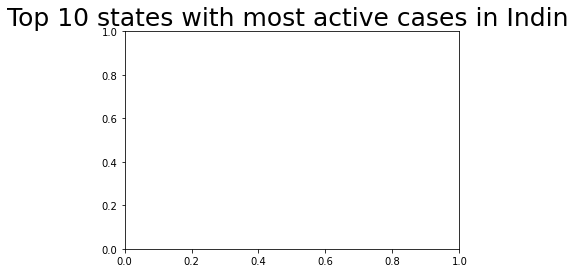

In [ ]:
plt.title("Top 10 states with most active cases in Indin ",size=25)

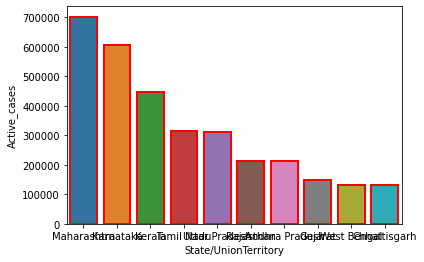

In [ ]:
ax=sns.barplot(data= Top_10_active_cases.iloc[:10], y = "Active_cases", x="State/UnionTerritory",linewidth=2, edgecolor='red')

Text(0, 0.5, 'Total Active Cases')

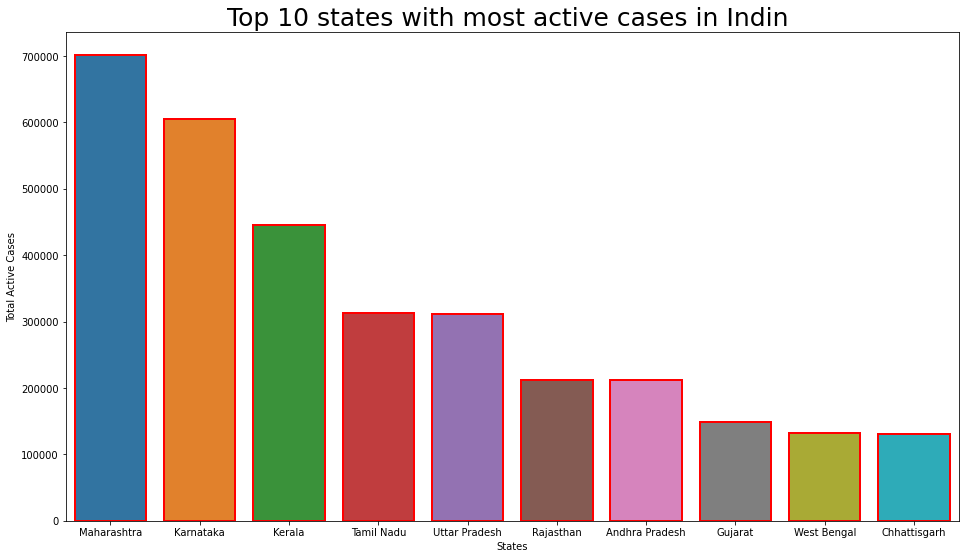

In [ ]:
# Top 10 active cases states

Top_10_active_cases = covid_df.groupby(by='State/UnionTerritory').max()[['Active_cases','Date']].sort_values(by = ['Active_cases'],ascending=False).reset_index() 
fig =plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in Indin ",size=25)
ax=sns.barplot(data= Top_10_active_cases.iloc[:10], y = "Active_cases", x="State/UnionTerritory",linewidth=2, edgecolor='red')
plt.xlabel("States")
plt.ylabel("Total Active Cases")

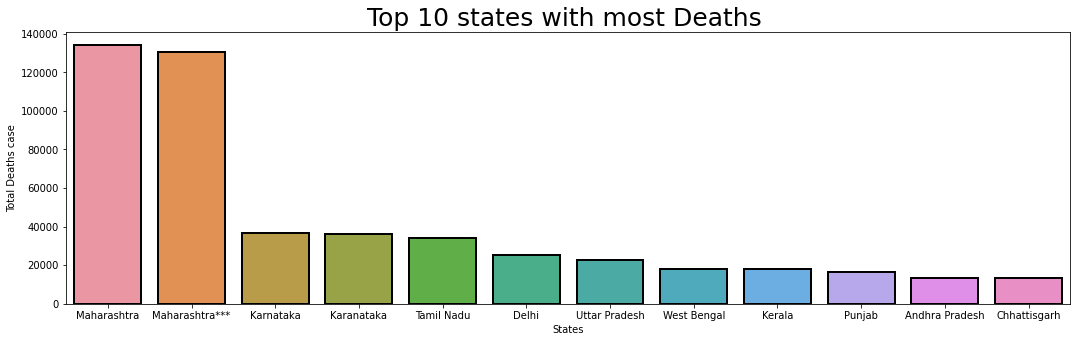

In [ ]:
# Top 10 sates with highest deaths

Top_10_deaths = covid_df.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by = ['Deaths'],ascending=False).reset_index() 
fig =plt.figure(figsize=(18,5))
plt.title("Top 10 states with most Deaths ",size=25)
ax=sns.barplot(data= Top_10_deaths.iloc[:12], y = "Deaths", x="State/UnionTerritory",linewidth=2, edgecolor='black')
plt.xlabel("States")
plt.ylabel("Total Deaths case")
plt.show()

Text(0.5, 1.0, 'Top 5 Affected States in India')

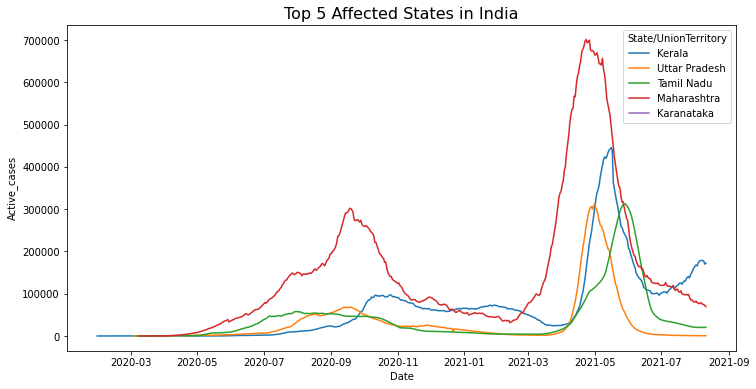

In [ ]:
# Growth trend 
fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karanataka','Kerala','Tamil Nadu','Uttar Pradesh'])],
                                x="Date", y="Active_cases",hue="State/UnionTerritory")

ax.set_title("Top 5 Affected States in India",size=16)

In [ ]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vaccine_df.rename(columns={'Updated On':'Vaccine_Date'},inplace=True)

In [ ]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [ ]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [ ]:
 vaccination = vaccine_df.drop(columns=['Sputnik V (Doses Administered)',
                                        'AEFI',
                                        '18-44 Years (Doses Administered)',
                                        '45-60 Years (Doses Administered)',
                                        '60+ Years (Doses Administered)'],
                                        axis=1) 

In [ ]:
vaccine_df.head()

In [ ]:
#Male vs Female vaccination 
male=vaccination["Male(Individuals Vaccinated)"].sum()
female=vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male","Female"],values=[male,female],title="Male ans Female vaccintion")

In [ ]:
# Remove rows  where state = India
vaccine=vaccine_df[vaccine_df.State!='India']
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vaccine.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)
vaccine.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [ ]:
#Most vaccinated Sates
max_vac=vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]
max_vac 

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


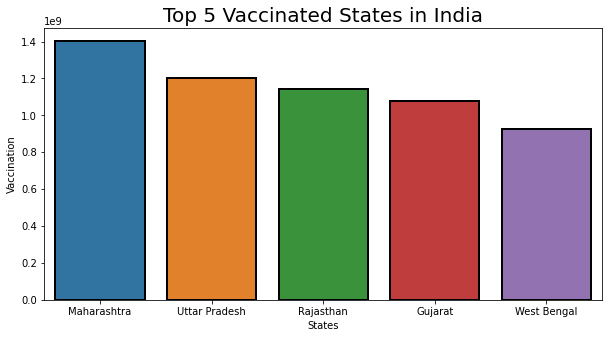

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated States in India",size =20)
x=sns.barplot(data= max_vac.iloc[:10],y=max_vac.Total,x=max_vac.index,linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()

In [ ]:
#Min 5 vaccinated Sates
max_vac=vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=True)[:5]
max_vac 

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Last 5 Vaccinated States in India",size =20)
x=sns.barplot(data= max_vac.iloc[:10],y=max_vac.Total,x=max_vac.index,linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/covid_19_data/country_vaccinations.csv") 

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
df.fillna(0,inplace=True)
#drop null 
df.drop(df.index[df['iso_code']==0],inplace=True)

In [ ]:
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   86512 non-null  float64
 4   people_vaccinated                    86512 non-null  float64
 5   people_fully_vaccinated              86512 non-null  float64
 6   daily_vaccinations_raw               86512 non-null  float64
 7   daily_vaccinations                   86512 non-null  float64
 8   total_vaccinations_per_hundred       86512 non-null  float64
 9   people_vaccinated_per_hundred        86512 non-null  float64
 10  people_fully_vaccinated_per_hundred  86512 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [ ]:
df.columns
#drop the columns ths we are not use in pro.

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
df.drop(["source_name","source_website"], axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df_USA=df[df['iso_code']=='USA'].copy()
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
82360,United States,USA,2020-12-13,30288.0,25125.0,5897.0,0.0,0.0,0.01,0.01,0.00,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82361,United States,USA,2020-12-14,34867.0,29543.0,6017.0,4579.0,4579.0,0.01,0.01,0.00,14.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.00,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82363,United States,USA,2020-12-16,244549.0,231496.0,6757.0,159911.0,71420.0,0.07,0.07,0.00,215.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82364,United States,USA,2020-12-17,517161.0,496980.0,7507.0,272612.0,121718.0,0.16,0.15,0.00,367.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82826,United States,USA,2022-03-24,559861103.0,255273235.0,217422759.0,155644.0,156889.0,168.63,76.89,65.49,473.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82827,United States,USA,2022-03-25,560045501.0,255322519.0,217466150.0,184398.0,149541.0,168.68,76.90,65.50,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82828,United States,USA,2022-03-26,560137738.0,255348742.0,217488822.0,92237.0,143396.0,168.71,76.91,65.51,432.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82829,United States,USA,2022-03-27,560167076.0,255357149.0,217495812.0,29338.0,137525.0,168.72,76.91,65.51,414.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [ ]:
df_USA.drop(df_USA.index[df_USA['total_vaccinations']==0],inplace=True)
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
82360,United States,USA,2020-12-13,30288.0,25125.0,5897.0,0.0,0.0,0.01,0.01,0.00,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82361,United States,USA,2020-12-14,34867.0,29543.0,6017.0,4579.0,4579.0,0.01,0.01,0.00,14.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.00,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82363,United States,USA,2020-12-16,244549.0,231496.0,6757.0,159911.0,71420.0,0.07,0.07,0.00,215.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82364,United States,USA,2020-12-17,517161.0,496980.0,7507.0,272612.0,121718.0,0.16,0.15,0.00,367.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82826,United States,USA,2022-03-24,559861103.0,255273235.0,217422759.0,155644.0,156889.0,168.63,76.89,65.49,473.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82827,United States,USA,2022-03-25,560045501.0,255322519.0,217466150.0,184398.0,149541.0,168.68,76.90,65.50,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82828,United States,USA,2022-03-26,560137738.0,255348742.0,217488822.0,92237.0,143396.0,168.71,76.91,65.51,432.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
82829,United States,USA,2022-03-27,560167076.0,255357149.0,217495812.0,29338.0,137525.0,168.72,76.91,65.51,414.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


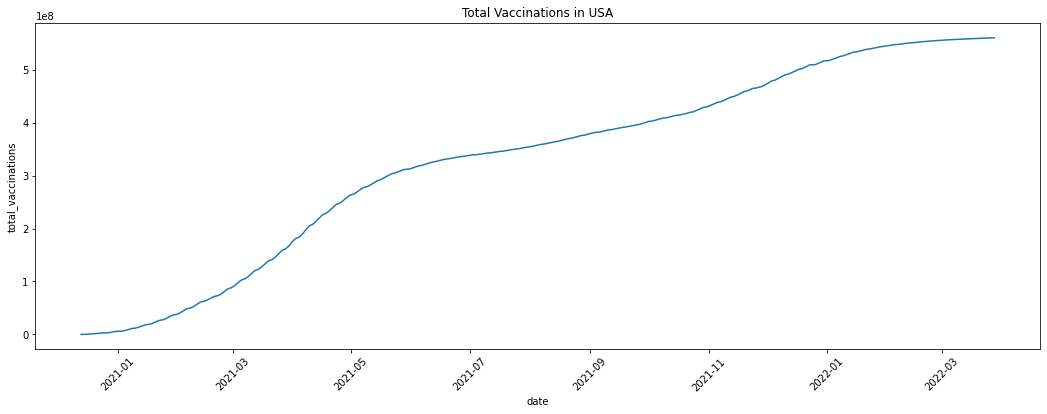

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA,x="date",y="total_vaccinations")
plt.title("Total Vaccinations in USA")
plt.xticks(rotation=45)
plt.show()

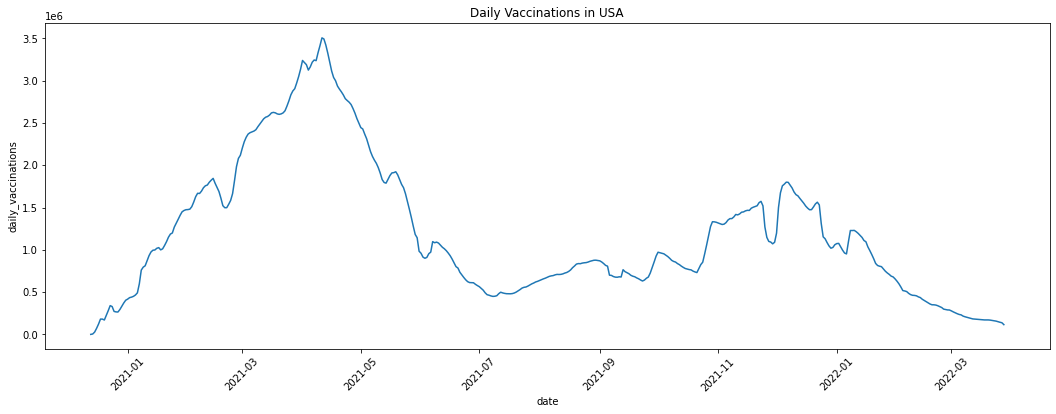

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA,x="date",y="daily_vaccinations")
plt.title("Daily Vaccinations in USA")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_India=df[df['iso_code']=='IND'].copy()
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
35372,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35373,India,IND,2021-01-16,1.911810e+05,191181.0,0.0,191181.0,191181.0,0.01,0.01,0.00,137.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35374,India,IND,2021-01-17,2.243010e+05,224301.0,0.0,33120.0,112150.0,0.02,0.02,0.00,80.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35375,India,IND,2021-01-18,4.540490e+05,454049.0,0.0,229748.0,151350.0,0.03,0.03,0.00,109.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35376,India,IND,2021-01-19,6.748350e+05,674835.0,0.0,220786.0,168709.0,0.05,0.05,0.00,121.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,India,IND,2022-03-25,1.826266e+09,980435665.0,824764568.0,1997100.0,2433734.0,131.06,70.36,59.19,1747.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35807,India,IND,2022-03-26,1.830285e+09,982687842.0,826360688.0,4019460.0,2830351.0,131.35,70.52,59.30,2031.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35808,India,IND,2022-03-27,1.831348e+09,983190780.0,826884564.0,1062451.0,2851859.0,131.43,70.56,59.34,2047.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35809,India,IND,2022-03-28,1.833040e+09,984051283.0,827610878.0,1692273.0,2736644.0,131.55,70.62,59.39,1964.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [ ]:
df_India.drop(df_India.index[df_India['total_vaccinations']==0],inplace=True)
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
35373,India,IND,2021-01-16,1.911810e+05,191181.0,0.0,191181.0,191181.0,0.01,0.01,0.00,137.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35374,India,IND,2021-01-17,2.243010e+05,224301.0,0.0,33120.0,112150.0,0.02,0.02,0.00,80.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35375,India,IND,2021-01-18,4.540490e+05,454049.0,0.0,229748.0,151350.0,0.03,0.03,0.00,109.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35376,India,IND,2021-01-19,6.748350e+05,674835.0,0.0,220786.0,168709.0,0.05,0.05,0.00,121.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35377,India,IND,2021-01-20,8.064840e+05,806484.0,0.0,131649.0,161297.0,0.06,0.06,0.00,116.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,India,IND,2022-03-25,1.826266e+09,980435665.0,824764568.0,1997100.0,2433734.0,131.06,70.36,59.19,1747.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35807,India,IND,2022-03-26,1.830285e+09,982687842.0,826360688.0,4019460.0,2830351.0,131.35,70.52,59.30,2031.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35808,India,IND,2022-03-27,1.831348e+09,983190780.0,826884564.0,1062451.0,2851859.0,131.43,70.56,59.34,2047.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
35809,India,IND,2022-03-28,1.833040e+09,984051283.0,827610878.0,1692273.0,2736644.0,131.55,70.62,59.39,1964.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"


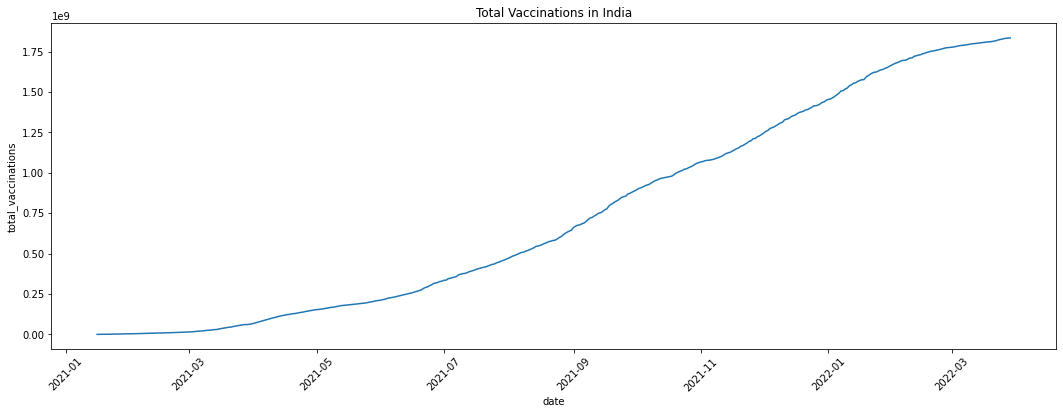

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India,x="date",y="total_vaccinations")
plt.title("Total Vaccinations in India")
plt.xticks(rotation=45)
plt.show()

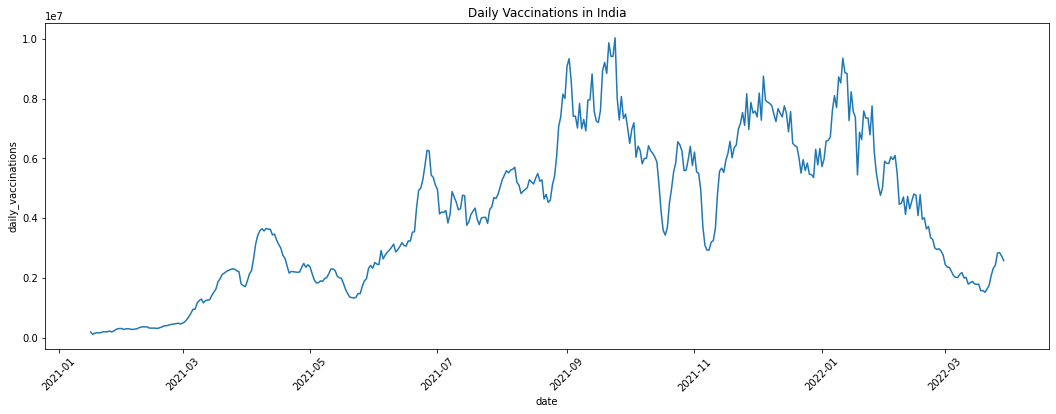

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India,x="date",y="daily_vaccinations")
plt.title("Daily Vaccinations in India")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#top 10 conutries with highest vaccinated 
vacc_by_country=df.groupby('country').max().sort_values('total_vaccinations',ascending=False)
vacc_by_country=vacc_by_country.iloc[:10]
vacc_by_country 

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
country,,,,,,,,,,,,
China,CHN,2022-03-29,3.263129e+09,1.275541e+09,1.240777e+09,24741000.0,22424286.0,225.94,88.32,85.91,15527.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-03-29,1.834501e+09,9.848381e+08,8.282295e+08,18627269.0,10037995.0,131.66,70.68,59.44,7204.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-03-28,5.601818e+08,2.553624e+08,2.174990e+08,4555627.0,3506960.0,168.72,76.91,65.51,10563.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1.602729e+08,3976605.0,1941268.0,193.26,84.62,74.90,9072.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1.588305e+08,2952259.0,1897011.0,136.45,71.01,57.47,6864.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-03-29,2.543456e+08,1.024675e+08,1.006337e+08,6586453.0,1997542.0,201.78,81.29,79.84,15847.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,1.077127e+08,7038358.0,3758404.0,146.50,76.69,64.77,22600.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,1.018812e+08,2339218.0,2175773.0,97.41,56.87,45.24,9662.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,7.775411e+07,2091069.0,1675471.0,206.93,81.44,79.20,17067.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."


In [ ]:
#now sort people per 100 of the population
vacc_by_country=vacc_by_country.sort_values('total_vaccinations_per_hundred',ascending=False)
vacc_by_country

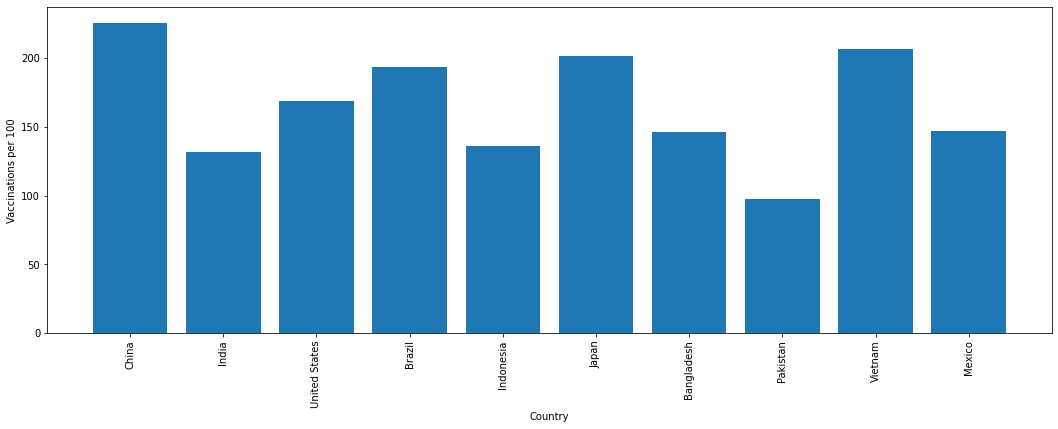

In [ ]:
plt.figure(figsize=(18,6))
plt.bar(vacc_by_country.index,vacc_by_country.total_vaccinations_per_hundred)
plt.xticks(rotation=90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

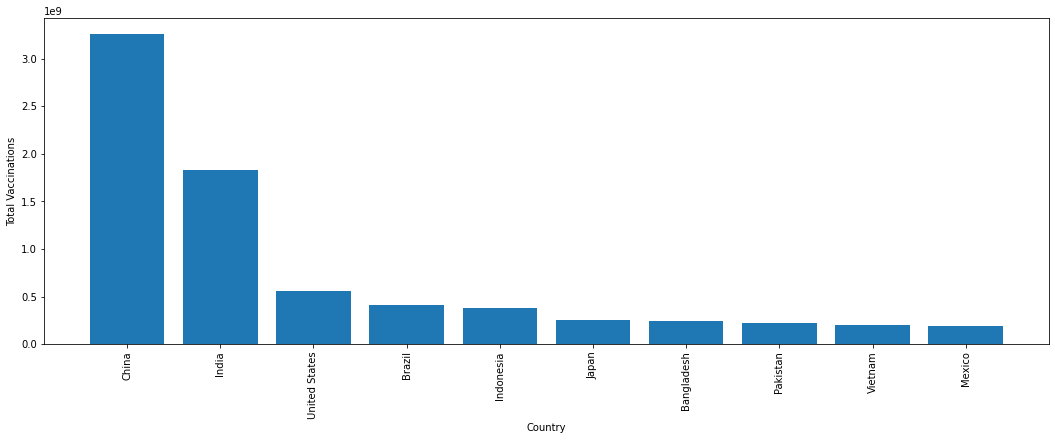

In [ ]:
vacc_by_country=df.groupby('country').max().sort_values('total_vaccinations',ascending=False)
vacc_by_country=vacc_by_country.iloc[:10]
vacc_by_country 


plt.figure(figsize=(18,6))
plt.bar(vacc_by_country.index,vacc_by_country.total_vaccinations,)
plt.xticks(rotation=90)
plt.ylabel('Total Vaccinations')
plt.xlabel('Country')
plt.show()

In [ ]:
vacc_names_by_country=df.groupby('vaccines').max().sort_values('total_vaccinations',ascending=False)
vacc_names_by_country.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
vaccines,,,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,1.240777e+09,24741000.0,22424286.0,225.94,88.32,85.91,15527.0
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,8.282295e+08,18627269.0,10037995.0,131.66,70.68,59.44,7204.0
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,2.174990e+08,4555627.0,3506960.0,227.27,83.28,82.60,22995.0
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1.602729e+08,3976605.0,1941268.0,193.26,84.62,74.90,9072.0
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1.588305e+08,2952259.0,1897011.0,136.45,71.01,57.47,6864.0


In [ ]:
#top 10 
vacc_names_by_country=vacc_names_by_country.iloc[:10]
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
vaccines,,,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,1.240777e+09,24741000.0,22424286.0,225.94,88.32,85.91,15527.0
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,8.282295e+08,18627269.0,10037995.0,131.66,70.68,59.44,7204.0
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,2.174990e+08,4555627.0,3506960.0,227.27,83.28,82.60,22995.0
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1.602729e+08,3976605.0,1941268.0,193.26,84.62,74.90,9072.0
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1.588305e+08,2952259.0,1897011.0,136.45,71.01,57.47,6864.0
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-03-29,2.543456e+08,1.024675e+08,1.006337e+08,6586453.0,1997542.0,237.79,86.10,82.21,70706.0
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,1.077127e+08,7038358.0,3758404.0,146.50,76.69,64.77,22600.0
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,1.018812e+08,2339218.0,2175773.0,97.41,56.87,45.24,9662.0
"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,7.775411e+07,2091069.0,1675471.0,206.93,81.44,79.20,17067.0


In [ ]:
vacc_names_by_country=vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,1.240777e+09,24741000.0,22424286.0,225.94,88.32,85.91,15527.0
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,8.282295e+08,18627269.0,10037995.0,131.66,70.68,59.44,7204.0
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,2.174990e+08,4555627.0,3506960.0,227.27,83.28,82.60,22995.0
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1.602729e+08,3976605.0,1941268.0,193.26,84.62,74.90,9072.0
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1.588305e+08,2952259.0,1897011.0,136.45,71.01,57.47,6864.0
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-03-29,2.543456e+08,1.024675e+08,1.006337e+08,6586453.0,1997542.0,237.79,86.10,82.21,70706.0
6,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,1.077127e+08,7038358.0,3758404.0,146.50,76.69,64.77,22600.0
7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,1.018812e+08,2339218.0,2175773.0,97.41,56.87,45.24,9662.0
8,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,7.775411e+07,2091069.0,1675471.0,206.93,81.44,79.20,17067.0
9,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2022-03-29,1.919079e+08,8.558029e+07,7.971176e+07,7246123.0,1648223.0,147.32,65.70,61.19,12653.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

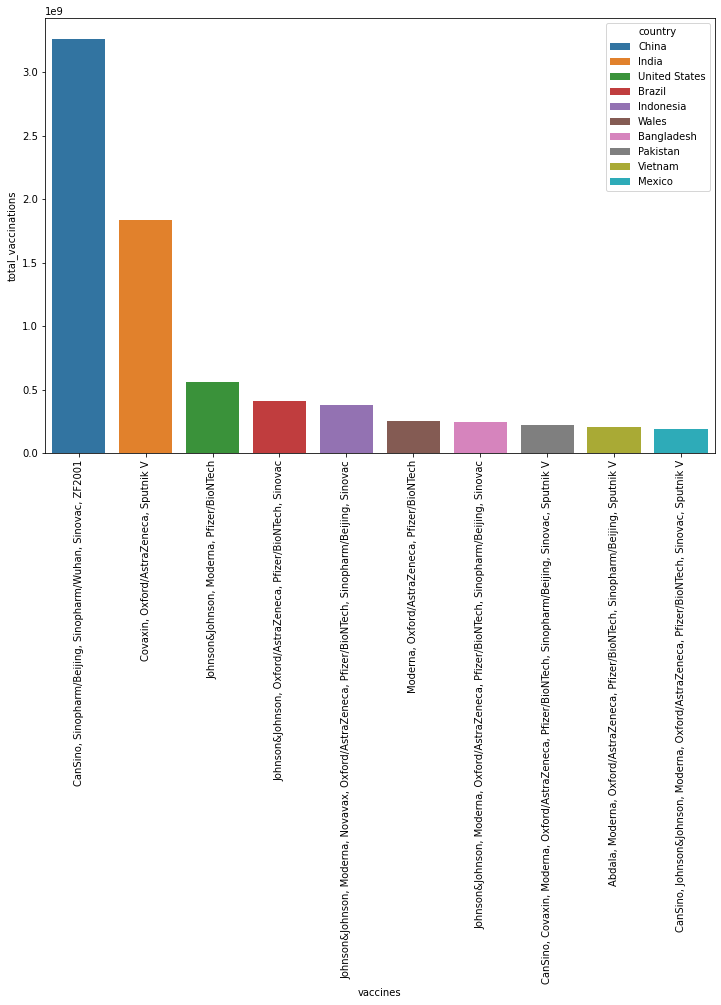

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=vacc_names_by_country,x='vaccines',y='total_vaccinations',hue='country',dodge=False)
plt.xticks(rotation=90 )          


In [ ]:
fig=px.choropleth(df.reset_index(),locations="iso_code",color="total_vaccinations_per_hundred",color_continuous_scale=px.colors.sequential.Electric,
                  title="Total Vaccinatons par 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()